Connected to tracking-barbell-exercises_2 (Python 3.8.20)

In [1]:
df = pd.read_pickle("../../data/interim/03_data_features.pkl")

NameError: name 'pd' is not defined

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

ModuleNotFoundError: No module named 'seaborn'

In [3]:
pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

df = pd.read_pickle("../../data/interim/03_data_features.pkl")

In [6]:
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.178434,0.951070,-0.166391,-28.374126,-11.656954,26.137415,B,bench,heavy,30,...,1.305755,1.065814e-14,-34.380629,23.800710,-13.082053,-21.105623,18.129418,-64.519718,-12.379067,1
2019-01-11 15:08:09.000,-0.052452,0.943648,-0.025489,3.669106,-2.301694,1.832173,B,bench,heavy,30,...,1.601410,2.842171e-14,-43.728982,29.782742,14.728275,-34.524399,11.017852,-43.942175,14.073251,1
2019-01-11 15:08:09.600,-0.046565,0.901448,-0.053860,4.288229,4.434881,-5.980940,B,bench,heavy,30,...,1.423954,7.105427e-15,-10.922305,10.624528,9.398990,3.289876,31.633793,-31.824063,-33.185891,1
2019-01-11 15:08:10.600,-0.198644,0.963174,-0.170528,1.551629,-2.870890,-6.121055,B,bench,heavy,30,...,1.339627,-5.684342e-14,55.407939,-3.628516,31.387957,-20.927640,-48.488329,2.256963,19.301024,1
2019-01-11 15:08:11.400,-0.193487,0.973493,-0.194861,-32.380685,-8.347085,22.572028,B,bench,heavy,30,...,1.203958,-2.309264e-14,-32.480868,33.774813,-7.520160,-18.873217,8.860075,-61.187904,-6.283743,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:24.600,0.022700,-1.284016,-0.033876,-27.640236,9.343802,11.873784,E,row,medium,90,...,1.570763,1.421085e-14,68.028235,-46.800323,48.242529,-27.761387,-52.108596,-15.544840,7.435229,0
2019-01-20 17:33:25.000,-0.043900,-0.935096,-0.053807,4.043945,-12.198244,2.481547,E,row,medium,90,...,1.052405,-6.039613e-14,-9.831747,13.975454,-58.037356,42.461320,-3.414175,-1.082287,19.392987,0
2019-01-20 17:33:26.000,0.067257,-0.569016,0.224619,-14.471540,3.249552,6.529688,E,row,medium,90,...,1.294281,-7.105427e-15,-18.478562,-63.472812,-75.366669,-0.403736,54.733024,-25.491632,-0.304794,4


In [7]:
df.columns

Index(['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'participant',
       'label', 'category', 'set',
       ...
       'gyr_r_pse', 'gyr_r_freq_0.0_Hz_ws_14', 'gyr_r_freq_0.357_Hz_ws_14',
       'gyr_r_freq_0.714_Hz_ws_14', 'gyr_r_freq_1.071_Hz_ws_14',
       'gyr_r_freq_1.429_Hz_ws_14', 'gyr_r_freq_1.786_Hz_ws_14',
       'gyr_r_freq_2.143_Hz_ws_14', 'gyr_r_freq_2.5_Hz_ws_14', 'cluster'],
      dtype='object', length=121)

In [8]:
df["duration"]

epoch (ms)
2019-01-11 15:08:08.000    16.0
2019-01-11 15:08:09.000    16.0
2019-01-11 15:08:09.600    16.0
2019-01-11 15:08:10.600    16.0
2019-01-11 15:08:11.400    16.0
                           ... 
2019-01-20 17:33:24.600    19.0
2019-01-20 17:33:25.000    19.0
2019-01-20 17:33:26.000    19.0
2019-01-20 17:33:26.400    19.0
2019-01-20 17:33:26.800    19.0
Name: duration, Length: 2455, dtype: float64

In [13]:
df.drop(columns=["duration"], inplace=True)

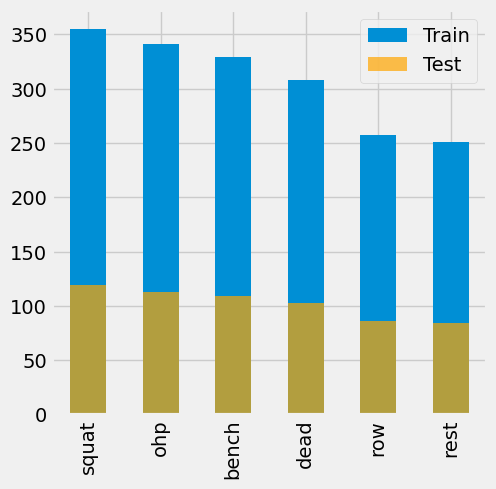

In [14]:
df_train = df.drop(columns=["participant", "category", "set"])


X = df_train.drop(columns=["label"])
y = df_train["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
# stratify to split equally  and maintain the same class distribution 

fig, ax = plt.subplots(figsize=(5, 5))
y_train.value_counts().plot(kind="bar", ax=ax, label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="orange", alpha=0.7, label="Test")
plt.legend()
plt.show()

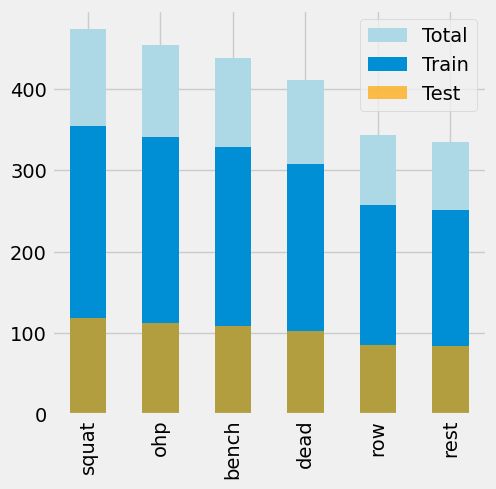

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
df_train["label"].value_counts().plot(kind="bar", ax=ax , color = "lightblue", label="Total")
y_train.value_counts().plot(kind="bar", ax=ax, label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="orange", alpha=0.7, label="Test")
plt.legend()
plt.show()

In [17]:
print(df_train.columns.tolist())

['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'label', 'pca_1', 'pca_2', 'pca_3', 'acc_r', 'gyr_r', 'acc_x_temp_mean_ws_5', 'acc_x_temp_std_ws_5', 'acc_y_temp_mean_ws_5', 'acc_y_temp_std_ws_5', 'acc_z_temp_mean_ws_5', 'acc_z_temp_std_ws_5', 'gyr_x_temp_mean_ws_5', 'gyr_x_temp_std_ws_5', 'gyr_y_temp_mean_ws_5', 'gyr_y_temp_std_ws_5', 'gyr_z_temp_mean_ws_5', 'gyr_z_temp_std_ws_5', 'acc_r_temp_mean_ws_5', 'acc_r_temp_std_ws_5', 'gyr_r_temp_mean_ws_5', 'gyr_r_temp_std_ws_5', 'acc_y_max_freq', 'acc_y_freq_weighted', 'acc_y_pse', 'acc_y_freq_0.0_Hz_ws_14', 'acc_y_freq_0.357_Hz_ws_14', 'acc_y_freq_0.714_Hz_ws_14', 'acc_y_freq_1.071_Hz_ws_14', 'acc_y_freq_1.429_Hz_ws_14', 'acc_y_freq_1.786_Hz_ws_14', 'acc_y_freq_2.143_Hz_ws_14', 'acc_y_freq_2.5_Hz_ws_14', 'acc_x_max_freq', 'acc_x_freq_weighted', 'acc_x_pse', 'acc_x_freq_0.0_Hz_ws_14', 'acc_x_freq_0.357_Hz_ws_14', 'acc_x_freq_0.714_Hz_ws_14', 'acc_x_freq_1.071_Hz_ws_14', 'acc_x_freq_1.429_Hz_ws_14', 'acc_x_freq_1.786_Hz_ws_14', 'acc_x_

In [20]:
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]

# Square features
square_features = ["acc_r","gyr_r"]

# PCA features
pca_features = ["pca_1", "pca_2", "pca_3"]

# Time-domain features
time_features = [f for f in df_train.columns if "_temp_" in f]

# Frequency-domain features
frequency_features = [f for f in df_train.columns if ("_freq_" in f )or ("_pse" in f)]

# Cluster-based features
cluster_features = ["cluster"]

In [21]:
print("Basic features:", len(basic_features))
print("Square features:", len(square_features))
print("PCA features:", len(pca_features))
print("Time-domain features:", len(time_features))
print("Frequency-domain features:", len(frequency_features))
print("Cluster features:", len(cluster_features))

Basic features: 6
Square features: 2
PCA features: 3
Time-domain features: 16
Frequency-domain features: 80
Cluster features: 1


In [22]:
frequency_features = [f for f in df_train.columns if ("_freq" in f )or ("_pse" in f)]

In [23]:
print("Frequency-domain features:", len(frequency_features))

Frequency-domain features: 88


In [24]:
feature_set_1= list(set(basic_features))

feature_set_2 = list(set(basic_features + square_features + pca_features))

feature_set_3 = list(set(feature_set_2 + time_features))

feature_set_final = list(set(feature_set_3 + frequency_features + cluster_features))

In [25]:
learner = ClassificationAlgorithms()

max_feature = 10

In [27]:
selected_features , ordered_features , ordered_scores = learner.forward_selection(
    max_features=max_feature, X_train= X_train , y_train=y_train)

0
1
2
3
4
5
6
7
8
9


In [28]:
selected_features

['pca_1',
 'acc_x_temp_mean_ws_5',
 'acc_z_temp_mean_ws_5',
 'acc_z_freq_0.357_Hz_ws_14',
 'gyr_r_freq_weighted',
 'gyr_r_freq_0.714_Hz_ws_14',
 'acc_x_freq_0.357_Hz_ws_14',
 'gyr_x_freq_1.071_Hz_ws_14',
 'acc_r_freq_2.143_Hz_ws_14',
 'acc_y_freq_0.0_Hz_ws_14']

In [29]:
ordered_features

['pca_1',
 'acc_x_temp_mean_ws_5',
 'acc_z_temp_mean_ws_5',
 'acc_z_freq_0.357_Hz_ws_14',
 'gyr_r_freq_weighted',
 'gyr_r_freq_0.714_Hz_ws_14',
 'acc_x_freq_0.357_Hz_ws_14',
 'gyr_x_freq_1.071_Hz_ws_14',
 'acc_r_freq_2.143_Hz_ws_14',
 'acc_y_freq_0.0_Hz_ws_14']

In [30]:
ordered_scores

[0.864204236827811,
 0.9570885388375883,
 0.9820749592612711,
 0.9896795219989136,
 0.9929386203150462,
 0.9945681694731124,
 0.9956545355784899,
 0.9961977186311787,
 0.9967409016838674,
 0.9967409016838674]

In [32]:
feature_set_4 = list(set(feature_set_3 + frequency_features + cluster_features))

In [33]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features
]

feature_names = [
    "Feature Set 1",
    "Feature Set 2",
    "Feature Set 3",
    "Feature Set 4",
    "Selected Features"
]

In [34]:
iterations = 1 
score_df = pd.DataFrame()

In [35]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN


c:\Users\manav anand\.conda\envs\tracking-barbell-exercises_2\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\manav anand\.conda\envs\tracking-barbell-exercises_2\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\manav anand\.conda\envs\tracking-barbell-exercises_2\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\manav anand\.conda\envs\tracking-barbell-exercises_2\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\manav anand\.conda\envs\tracking-barbell-exercises_2\lib\site-packages\sklearn\metrics\_scorer.p

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [36]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_features = list(possible_feature_sets[i])
    selected_train_X = X_train[selected_features]
    selected_test_X = X_test[selected_features]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN


c:\Users\manav anand\.conda\envs\tracking-barbell-exercises_2\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\manav anand\.conda\envs\tracking-barbell-exercises_2\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\Users\manav anand\.conda\envs\tracking-barbell-exercises_2\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\Users\manav anand\.conda\envs\tracking-barbell-exercises_2\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\manav anand\.conda\envs\tracking-barbell-exercises_2\lib\site-packages\sklearn\metrics\_scorer.p

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [37]:
import sklearn
print(sklearn.__version__)


1.3.0


In [38]:
pip uninstall scikit-learn
pip install scikit-learn==1.2.1



SyntaxError: invalid syntax (<ipython-input-38-0770aa75fe61>, line 1)

In [40]:
import sklearn
print(sklearn.__version__)

1.3.0


In [41]:
import sklearn
print(sklearn.__version__)

1.3.0


In [42]:
import sklearn
print(sklearn.__version__)

1.3.0


Restarted tracking-barbell-exercises_2 (Python 3.8.20)

In [1]:
import sklearn
print(sklearn.__version__)

1.2.1


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

df = pd.read_pickle("../../data/interim/03_data_features.pkl")
df.drop(columns=["duration"], inplace=True)

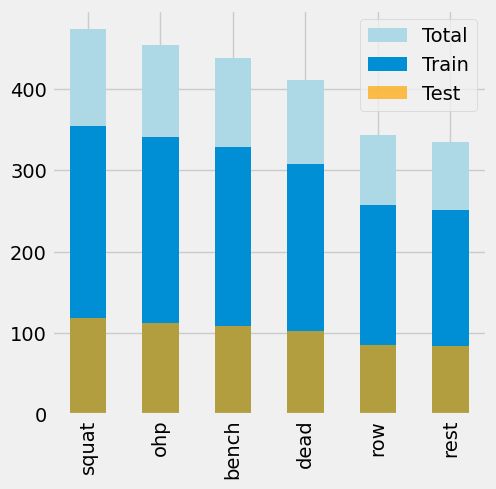

In [4]:
df_train = df.drop(columns=["participant", "category", "set"])


X = df_train.drop(columns=["label"])
y = df_train["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)
# stratify to split equally  and maintain the same class distribution 

fig, ax = plt.subplots(figsize=(5, 5))
df_train["label"].value_counts().plot(kind="bar", ax=ax , color = "lightblue", label="Total")
y_train.value_counts().plot(kind="bar", ax=ax, label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="orange", alpha=0.7, label="Test")
plt.legend()
plt.show()

In [5]:
# Basic features
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]

# Square features
square_features = ["acc_r","gyr_r"]

# PCA features
pca_features = ["pca_1", "pca_2", "pca_3"]

# Time-domain features
time_features = [f for f in df_train.columns if "_temp_" in f]

# Frequency-domain features
frequency_features = [f for f in df_train.columns if ("_freq" in f )or ("_pse" in f)]

# Cluster-based features
cluster_features = ["cluster"]

# print(df_train.columns)
print("Basic features:", len(basic_features))
print("Square features:", len(square_features))
print("PCA features:", len(pca_features))
print("Time-domain features:", len(time_features))
print("Frequency-domain features:", len(frequency_features))
print("Cluster features:", len(cluster_features))




feature_set_1= list(set(basic_features))

feature_set_2 = list(set(basic_features + square_features + pca_features))

feature_set_3 = list(set(feature_set_2 + time_features))

feature_set_4 = list(set(feature_set_3 + frequency_features + cluster_features))

Basic features: 6
Square features: 2
PCA features: 3
Time-domain features: 16
Frequency-domain features: 88
Cluster features: 1


In [6]:
learner = ClassificationAlgorithms()

max_feature = 10

In [7]:
selected_features = ['pca_1',
 'acc_x_temp_mean_ws_5',
 'acc_z_temp_mean_ws_5',
 'acc_z_freq_0.357_Hz_ws_14',
 'gyr_r_freq_weighted',
 'gyr_r_freq_0.714_Hz_ws_14',
 'acc_x_freq_0.357_Hz_ws_14',
 'gyr_x_freq_1.071_Hz_ws_14',
 'acc_r_freq_2.143_Hz_ws_14',
 'acc_y_freq_0.0_Hz_ws_14']

In [8]:
possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features
]

feature_names = [
    "Feature Set 1",
    "Feature Set 2",
    "Feature Set 3",
    "Feature Set 4",
    "Selected Features"
]

In [9]:
iterations = 1 
score_df = pd.DataFrame()

In [10]:
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_features = list(possible_feature_sets[i])
    selected_train_X = X_train[selected_features]
    selected_test_X = X_test[selected_features]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [11]:
score_df

,model,feature_set,accuracy
0,NN,Feature Set 1,0.923453
1,RF,Feature Set 1,0.931596
2,KNN,Feature Set 1,0.679153
3,DT,Feature Set 1,0.908795
4,NB,Feature Set 1,0.868078
0,NN,Feature Set 2,0.913681
1,RF,Feature Set 2,0.934853
2,KNN,Feature Set 2,0.672638
3,DT,Feature Set 2,0.910423
4,NB,Feature Set 2,0.871336


In [12]:
score_df.sort_values(by= "accuracy" , ascending= False)

,model,feature_set,accuracy
1,RF,Feature Set 4,0.978827
0,NN,Feature Set 3,0.977199
1,RF,Feature Set 3,0.975570
1,RF,Selected Features,0.962541
0,NN,Feature Set 4,0.960912
3,DT,Feature Set 3,0.960912
3,DT,Feature Set 4,0.954397
4,NB,Feature Set 4,0.947883
4,NB,Feature Set 3,0.942997
1,RF,Feature Set 2,0.934853


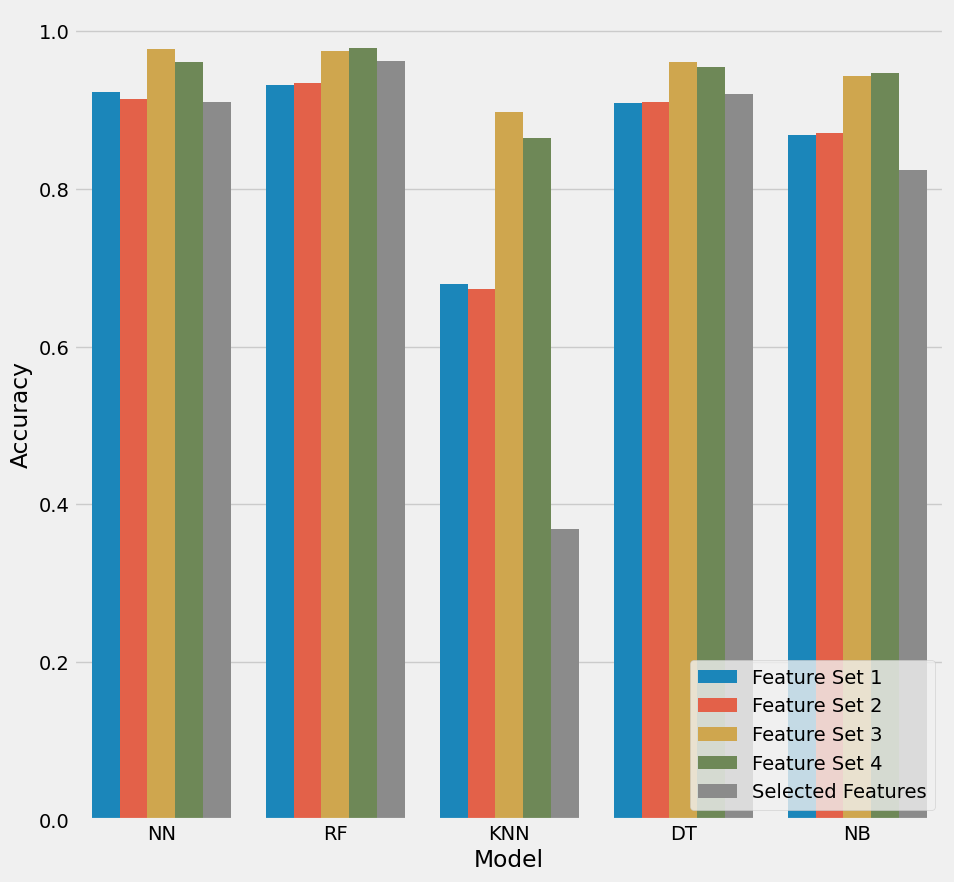

In [16]:
plt.figure(figsize=(10, 10))
sns.barplot(
    x="model",
    y="accuracy", 
    hue="feature_set", 
    data=score_df
)

plt.xlabel("Model")
plt.ylabel("Accuracy")
# plt.xlim(0.7, 1)  # Accuracy between 70% and 100%
plt.legend(loc="lower right")
plt.show()

In [17]:
X_train[feature_set_4]

,acc_y_freq_1.786_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,gyr_y_temp_mean_ws_5,acc_r_freq_0.0_Hz_ws_14,gyr_x_temp_std_ws_5,gyr_y,gyr_r_max_freq,acc_r_pse,acc_r_freq_1.429_Hz_ws_14,acc_r_freq_weighted,...,gyr_z_freq_1.786_Hz_ws_14,acc_x_freq_1.071_Hz_ws_14,gyr_z_freq_0.0_Hz_ws_14,acc_r_freq_0.714_Hz_ws_14,acc_y_freq_2.143_Hz_ws_14,gyr_x,gyr_z_freq_0.357_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,acc_x_freq_2.143_Hz_ws_14,acc_x_max_freq
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-20 17:26:12.000,0.474852,46.344051,49.604715,1.110223e-16,41.732199,20.502414,0.357,1.505514,-1.132953,23.975008,...,14.092653,-1.408035,1.847411e-13,1.559405,0.299009,6.223243,-332.559507,11.898114,-0.125795,0.357
2019-01-15 19:37:35.400,-0.328175,-20.324722,-0.145814,1.332268e-15,25.147635,-3.687141,0.357,1.449215,0.084568,-2.053186,...,-7.866345,0.029131,-8.881784e-15,-0.712994,-0.255504,65.152888,-40.849570,-47.014263,-0.042700,0.357
2019-01-14 13:51:36.000,-0.057786,5.492966,-5.781392,1.998401e-15,5.125396,-2.488302,0.714,0.874768,-0.220277,0.877255,...,14.268798,-0.175732,2.131628e-14,-0.546530,0.009730,9.032016,-14.743448,47.669595,-0.009186,0.357
2019-01-14 13:32:24.800,-0.132462,-19.958351,0.200763,-1.443290e-15,8.190909,-1.665116,0.714,0.395771,0.102344,0.954104,...,3.061237,0.097931,5.329071e-15,-0.880128,-0.073639,-9.680234,131.599261,19.857221,0.031449,0.714
2019-01-19 17:22:29.000,-0.097446,-7.534312,6.144588,-2.442491e-15,5.405997,-3.922726,1.071,1.617989,0.204904,1.461254,...,10.682603,0.113320,3.552714e-15,0.047424,-0.058677,-0.104118,-1.708787,12.339532,0.104554,1.429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-18 17:21:39.000,-0.202639,14.455078,-6.481096,1.443290e-15,14.303064,-3.716093,1.071,1.101215,-0.071226,3.042513,...,1.987656,-0.117584,-1.776357e-15,-0.486041,-0.162601,4.021417,20.882011,11.028043,-0.011142,0.714
2019-01-19 17:26:11.200,-0.568670,-35.878766,-34.149203,5.551115e-16,21.809647,-27.218737,0.714,1.027405,-1.067625,1.095325,...,-50.601657,0.162430,1.563194e-13,-0.746679,-0.596892,25.223475,374.514048,-28.746702,-0.191114,1.071
2019-01-20 17:22:34.800,-0.008705,0.027143,-1.311212,-2.664535e-15,0.768834,-1.810381,1.071,0.941987,-0.008644,0.171358,...,0.241372,-0.000868,4.440892e-16,-0.000673,-0.012264,-0.207680,-0.082873,0.629779,-0.001796,0.000


In [18]:
(
    class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            X_train[feature_set_4], y_train, selected_test_X, gridsearch=True
        )

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- acc_r
- acc_r_freq_0.0_Hz_ws_14
- acc_r_freq_0.357_Hz_ws_14
- acc_r_freq_0.714_Hz_ws_14
- acc_r_freq_1.071_Hz_ws_14
- ...


In [19]:
(
    class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(X_train[feature_set_4], 
                                  y_train, selected_test_X[feature_set_4], gridsearch=True)

KeyError: "['acc_y_freq_1.786_Hz_ws_14', 'gyr_r_freq_2.5_Hz_ws_14', 'gyr_y_temp_mean_ws_5', 'acc_r_freq_0.0_Hz_ws_14', 'gyr_x_temp_std_ws_5', 'gyr_y', 'gyr_r_max_freq', 'acc_r_pse', 'acc_r_freq_1.429_Hz_ws_14', 'acc_r_freq_weighted', 'gyr_r_temp_std_ws_5', 'acc_r_temp_std_ws_5', 'acc_r_max_freq', 'acc_x_freq_0.0_Hz_ws_14', 'acc_y_freq_1.071_Hz_ws_14', 'cluster', 'acc_x_freq_0.714_Hz_ws_14', 'acc_z_freq_weighted', 'gyr_y_pse', 'gyr_x_freq_1.429_Hz_ws_14', 'acc_z_freq_2.5_Hz_ws_14', 'gyr_x_freq_1.786_Hz_ws_14', 'acc_x_freq_2.5_Hz_ws_14', 'gyr_x_freq_weighted', 'acc_x', 'gyr_z_freq_0.714_Hz_ws_14', 'acc_z_pse', 'gyr_x_freq_2.143_Hz_ws_14', 'acc_z_freq_2.143_Hz_ws_14', 'pca_3', 'acc_z_temp_std_ws_5', 'acc_r_freq_2.5_Hz_ws_14', 'gyr_r_freq_1.071_Hz_ws_14', 'acc_y', 'gyr_z_max_freq', 'gyr_y_freq_2.143_Hz_ws_14', 'acc_y_freq_0.357_Hz_ws_14', 'acc_z_freq_1.429_Hz_ws_14', 'acc_r_freq_1.071_Hz_ws_14', 'gyr_z_temp_mean_ws_5', 'gyr_y_freq_0.714_Hz_ws_14', 'acc_z_max_freq', 'pca_2', 'gyr_y_freq_1.429_Hz_ws_14', 'gyr_y_freq_1.786_Hz_ws_14', 'gyr_y_temp_std_ws_5', 'acc_y_max_freq', 'acc_r', 'gyr_x_max_freq', 'gyr_z_freq_2.5_Hz_ws_14', 'acc_x_freq_weighted', 'acc_y_freq_1.429_Hz_ws_14', 'gyr_r_freq_0.0_Hz_ws_14', 'acc_z_freq_1.786_Hz_ws_14', 'acc_y_freq_0.714_Hz_ws_14', 'gyr_z_freq_weighted', 'acc_y_freq_2.5_Hz_ws_14', 'gyr_z_freq_1.071_Hz_ws_14', 'gyr_y_freq_0.357_Hz_ws_14', 'acc_x_freq_1.786_Hz_ws_14', 'acc_z_freq_0.0_Hz_ws_14', 'acc_y_freq_weighted', 'gyr_z_freq_2.143_Hz_ws_14', 'gyr_r_pse', 'gyr_y_max_freq', 'gyr_y_freq_weighted', 'gyr_x_freq_0.357_Hz_ws_14', 'acc_z', 'acc_r_freq_1.786_Hz_ws_14', 'gyr_x_pse', 'acc_r_freq_0.357_Hz_ws_14', 'gyr_z_freq_1.429_Hz_ws_14', 'acc_z_freq_1.071_Hz_ws_14', 'acc_y_pse', 'gyr_z_pse', 'acc_z_freq_0.714_Hz_ws_14', 'gyr_r_freq_1.786_Hz_ws_14', 'gyr_y_freq_2.5_Hz_ws_14', 'acc_y_temp_mean_ws_5', 'acc_x_temp_std_ws_5', 'acc_x_freq_1.429_Hz_ws_14', 'gyr_y_freq_1.071_Hz_ws_14', 'gyr_x_freq_0.0_Hz_ws_14', 'gyr_y_freq_0.0_Hz_ws_14', 'gyr_r_temp_mean_ws_5', 'gyr_z_temp_std_ws_5', 'acc_x_pse', 'acc_r_temp_mean_ws_5', 'gyr_r', 'gyr_r_freq_0.357_Hz_ws_14', 'gyr_z', 'gyr_x_temp_mean_ws_5', 'gyr_x_freq_2.5_Hz_ws_14', 'acc_y_temp_std_ws_5', 'gyr_x_freq_0.714_Hz_ws_14', 'gyr_r_freq_1.429_Hz_ws_14', 'gyr_z_freq_1.786_Hz_ws_14', 'acc_x_freq_1.071_Hz_ws_14', 'gyr_z_freq_0.0_Hz_ws_14', 'acc_r_freq_0.714_Hz_ws_14', 'acc_y_freq_2.143_Hz_ws_14', 'gyr_x', 'gyr_z_freq_0.357_Hz_ws_14', 'gyr_r_freq_2.143_Hz_ws_14', 'acc_x_freq_2.143_Hz_ws_14', 'acc_x_max_freq'] not in index"

In [21]:
(
    class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(X_train[feature_set_4], 
                                  y_train, X_test[feature_set_4], gridsearch=True)

In [22]:
accuracy = accuracy_score(y_test, class_test_y)
classes = class_test_prob_y.columns 

cm = confusion_matrix(y_test, class_test_y, labels=classes)

In [23]:
cm

array([[100,   0,   9,   0,   0,   0],
       [  0, 102,   0,   0,   1,   0],
       [  2,   0, 111,   0,   0,   0],
       [  0,   0,   0,  84,   0,   0],
       [  0,   1,   0,   0,  85,   0],
       [  0,   0,   0,   0,   0, 119]], dtype=int64)

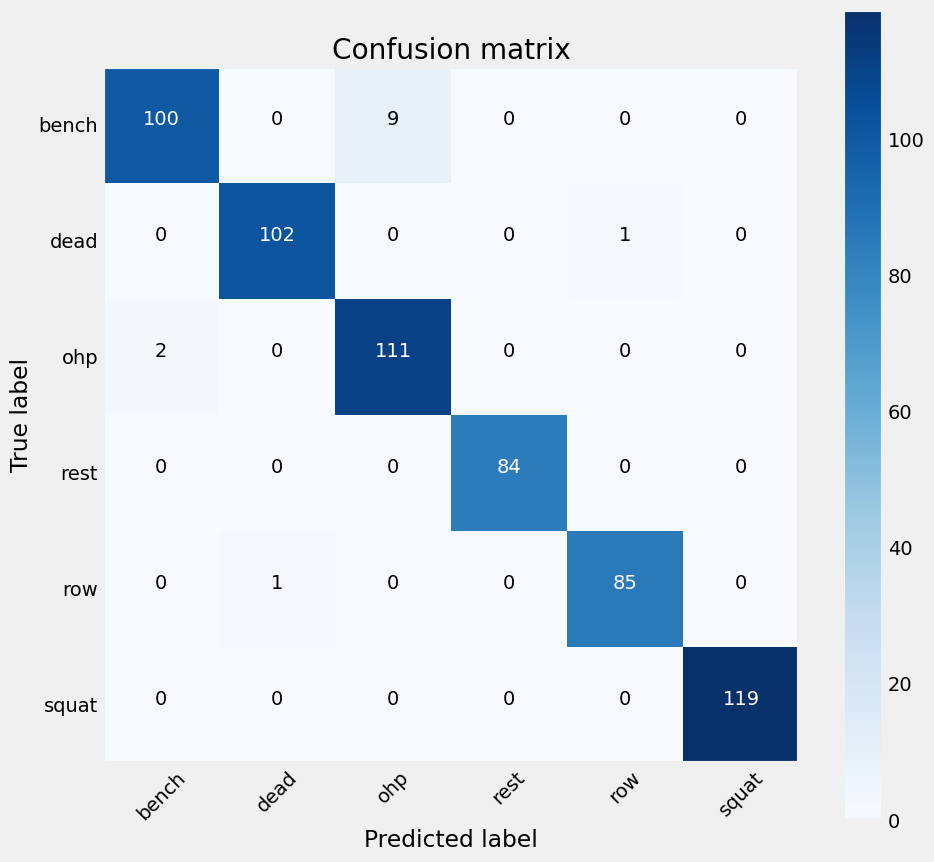

In [24]:
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()
# -------------------------------

In [26]:
participant_df = df.drop(["set", "category"], axis=1)

train_df = participant_df[participant_df["participant"] == "A"]
test_df = participant_df[participant_df["participant"] != "A"]

y_train = train_df["label"]
X_train = train_df.drop(["label", "participant"], axis=1)

y_test = test_df["label"]
X_test = test_df.drop(["label", "participant"], axis=1)

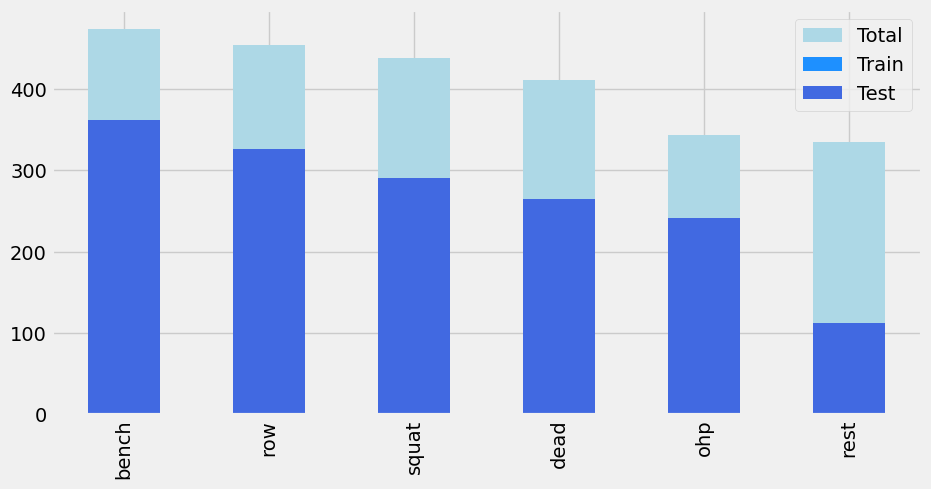

In [27]:
# Plot label distributions
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(kind='bar', ax=ax, color='lightblue', label='Total')
y_train.value_counts().plot(kind='bar', ax=ax, color = 'dodgerblue',label='Train')
y_test.value_counts().plot(kind='bar', ax=ax, color='royalblue', label='Test')

plt.legend()
plt.show()

In [32]:
train_df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,pca_1,pca_2,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:10:11.600,-0.063861,0.829300,-0.188152,16.193012,-2.222753,-14.381163,A,bench,-0.269561,-0.160961,...,1.652138,3.197442e-14,14.426933,10.976221,8.555226,-28.266334,15.678084,-12.203782,-15.043378,1
2019-01-11 15:10:12.000,-0.111627,1.029317,-0.199725,-6.237237,-17.284130,10.272547,A,bench,-0.341272,-0.169274,...,1.661592,1.776357e-15,10.944395,12.249185,-22.573455,27.388912,-11.534216,-13.270864,-11.410555,1
2019-01-11 15:10:12.600,-0.179509,0.924473,-0.202362,9.501332,7.257157,-11.932731,A,bench,-0.311568,-0.185159,...,1.628066,-3.552714e-15,-3.072043,-10.082027,12.494108,14.755721,-19.594129,-16.378386,5.289367,1
2019-01-11 15:10:13.000,-0.172622,0.978900,-0.211162,-16.044521,0.708400,17.185349,A,bench,-0.329948,-0.187258,...,1.462994,3.197442e-14,-8.409785,8.416285,-22.169901,-10.534351,2.250077,-27.050386,-16.743843,1
2019-01-11 15:10:13.600,0.005866,0.896829,-0.088014,7.740654,-6.526575,-1.007908,A,bench,-0.284049,-0.089207,...,1.593951,-1.421085e-14,-6.820010,-31.221774,-21.394402,23.152105,35.838287,-8.605694,16.807906,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-19 17:26:17.200,0.354036,-0.948844,0.389800,2.525803,-23.408712,9.673741,A,rest,0.374233,0.183503,...,1.476621,-5.684342e-14,45.594793,-35.637994,28.527929,-0.865821,-3.167231,41.955756,-18.012252,4
2019-01-19 17:26:17.800,0.193167,-0.882340,0.451174,23.097679,0.745791,-13.038597,A,rest,0.340438,0.194602,...,1.490375,-1.207923e-13,-53.014506,43.730997,7.271174,-31.383901,-26.907441,21.023595,-8.539227,4
2019-01-19 17:26:18.200,0.161606,-0.824739,0.519391,-19.779126,27.067074,2.838959,A,rest,0.319435,0.231559,...,1.441255,-8.171241e-14,-57.925088,70.368709,-2.293771,47.883647,2.493371,24.782650,-40.805614,4


In [33]:
test_df = participant_df[participant_df["participant"] != "A"]

In [34]:
test_df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,pca_1,pca_2,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.178434,0.951070,-0.166391,-28.374126,-11.656954,26.137415,B,bench,-0.320307,-0.163566,...,1.305755,1.065814e-14,-34.380629,23.800710,-13.082053,-21.105623,18.129418,-64.519718,-12.379067,1
2019-01-11 15:08:09.000,-0.052452,0.943648,-0.025489,3.669106,-2.301694,1.832173,B,bench,-0.303160,-0.061214,...,1.601410,2.842171e-14,-43.728982,29.782742,14.728275,-34.524399,11.017852,-43.942175,14.073251,1
2019-01-11 15:08:09.600,-0.046565,0.901448,-0.053860,4.288229,4.434881,-5.980940,B,bench,-0.289193,-0.077848,...,1.423954,7.105427e-15,-10.922305,10.624528,9.398990,3.289876,31.633793,-31.824063,-33.185891,1
2019-01-11 15:08:10.600,-0.198644,0.963174,-0.170528,1.551629,-2.870890,-6.121055,B,bench,-0.325531,-0.168933,...,1.339627,-5.684342e-14,55.407939,-3.628516,31.387957,-20.927640,-48.488329,2.256963,19.301024,1
2019-01-11 15:08:11.400,-0.193487,0.973493,-0.194861,-32.380685,-8.347085,22.572028,B,bench,-0.329825,-0.181692,...,1.203958,-2.309264e-14,-32.480868,33.774813,-7.520160,-18.873217,8.860075,-61.187904,-6.283743,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:24.600,0.022700,-1.284016,-0.033876,-27.640236,9.343802,11.873784,E,row,0.447769,-0.126979,...,1.570763,1.421085e-14,68.028235,-46.800323,48.242529,-27.761387,-52.108596,-15.544840,7.435229,0
2019-01-20 17:33:25.000,-0.043900,-0.935096,-0.053807,4.043945,-12.198244,2.481547,E,row,0.325476,-0.138852,...,1.052405,-6.039613e-14,-9.831747,13.975454,-58.037356,42.461320,-3.414175,-1.082287,19.392987,0
2019-01-20 17:33:26.000,0.067257,-0.569016,0.224619,-14.471540,3.249552,6.529688,E,row,0.218797,0.053309,...,1.294281,-7.105427e-15,-18.478562,-63.472812,-75.366669,-0.403736,54.733024,-25.491632,-0.304794,4


In [35]:
y_train

epoch (ms)
2019-01-11 15:10:11.600    bench
2019-01-11 15:10:12.000    bench
2019-01-11 15:10:12.600    bench
2019-01-11 15:10:13.000    bench
2019-01-11 15:10:13.600    bench
                           ...  
2019-01-19 17:26:17.200     rest
2019-01-19 17:26:17.800     rest
2019-01-19 17:26:18.200     rest
2019-01-19 17:26:18.600     rest
2019-01-19 17:26:19.200     rest
Name: label, Length: 856, dtype: object

In [36]:
y_test

epoch (ms)
2019-01-11 15:08:08.000    bench
2019-01-11 15:08:09.000    bench
2019-01-11 15:08:09.600    bench
2019-01-11 15:08:10.600    bench
2019-01-11 15:08:11.400    bench
                           ...  
2019-01-20 17:33:24.600      row
2019-01-20 17:33:25.000      row
2019-01-20 17:33:26.000      row
2019-01-20 17:33:26.400      row
2019-01-20 17:33:26.800      row
Name: label, Length: 1599, dtype: object

In [37]:
X_train

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,pca_1,pca_2,pca_3,acc_r,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:10:11.600,-0.063861,0.829300,-0.188152,16.193012,-2.222753,-14.381163,-0.269561,-0.160961,0.067692,0.852771,...,1.652138,3.197442e-14,14.426933,10.976221,8.555226,-28.266334,15.678084,-12.203782,-15.043378,1
2019-01-11 15:10:12.000,-0.111627,1.029317,-0.199725,-6.237237,-17.284130,10.272547,-0.341272,-0.169274,0.041157,1.054441,...,1.661592,1.776357e-15,10.944395,12.249185,-22.573455,27.388912,-11.534216,-13.270864,-11.410555,1
2019-01-11 15:10:12.600,-0.179509,0.924473,-0.202362,9.501332,7.257157,-11.932731,-0.311568,-0.185159,0.019577,0.963237,...,1.628066,-3.552714e-15,-3.072043,-10.082027,12.494108,14.755721,-19.594129,-16.378386,5.289367,1
2019-01-11 15:10:13.000,-0.172622,0.978900,-0.211162,-16.044521,0.708400,17.185349,-0.329948,-0.187258,0.007082,1.016186,...,1.462994,3.197442e-14,-8.409785,8.416285,-22.169901,-10.534351,2.250077,-27.050386,-16.743843,1
2019-01-11 15:10:13.600,0.005866,0.896829,-0.088014,7.740654,-6.526575,-1.007908,-0.284049,-0.089207,0.073080,0.901156,...,1.593951,-1.421085e-14,-6.820010,-31.221774,-21.394402,23.152105,35.838287,-8.605694,16.807906,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-19 17:26:17.200,0.354036,-0.948844,0.389800,2.525803,-23.408712,9.673741,0.374233,0.183503,0.026918,1.085169,...,1.476621,-5.684342e-14,45.594793,-35.637994,28.527929,-0.865821,-3.167231,41.955756,-18.012252,4
2019-01-19 17:26:17.800,0.193167,-0.882340,0.451174,23.097679,0.745791,-13.038597,0.340438,0.194602,-0.038204,1.009651,...,1.490375,-1.207923e-13,-53.014506,43.730997,7.271174,-31.383901,-26.907441,21.023595,-8.539227,4
2019-01-19 17:26:18.200,0.161606,-0.824739,0.519391,-19.779126,27.067074,2.838959,0.319435,0.231559,-0.093887,0.987966,...,1.441255,-8.171241e-14,-57.925088,70.368709,-2.293771,47.883647,2.493371,24.782650,-40.805614,4


In [38]:
X_test

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,pca_1,pca_2,pca_3,acc_r,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.178434,0.951070,-0.166391,-28.374126,-11.656954,26.137415,-0.320307,-0.163566,-0.015984,0.981865,...,1.305755,1.065814e-14,-34.380629,23.800710,-13.082053,-21.105623,18.129418,-64.519718,-12.379067,1
2019-01-11 15:08:09.000,-0.052452,0.943648,-0.025489,3.669106,-2.301694,1.832173,-0.303160,-0.061214,0.032908,0.945448,...,1.601410,2.842171e-14,-43.728982,29.782742,14.728275,-34.524399,11.017852,-43.942175,14.073251,1
2019-01-11 15:08:09.600,-0.046565,0.901448,-0.053860,4.288229,4.434881,-5.980940,-0.289193,-0.077848,0.040995,0.904255,...,1.423954,7.105427e-15,-10.922305,10.624528,9.398990,3.289876,31.633793,-31.824063,-33.185891,1
2019-01-11 15:08:10.600,-0.198644,0.963174,-0.170528,1.551629,-2.870890,-6.121055,-0.325531,-0.168933,-0.000006,0.998120,...,1.339627,-5.684342e-14,55.407939,-3.628516,31.387957,-20.927640,-48.488329,2.256963,19.301024,1
2019-01-11 15:08:11.400,-0.193487,0.973493,-0.194861,-32.380685,-8.347085,22.572028,-0.329825,-0.181692,-0.017549,1.011482,...,1.203958,-2.309264e-14,-32.480868,33.774813,-7.520160,-18.873217,8.860075,-61.187904,-6.283743,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:24.600,0.022700,-1.284016,-0.033876,-27.640236,9.343802,11.873784,0.447769,-0.126979,-0.064264,1.284663,...,1.570763,1.421085e-14,68.028235,-46.800323,48.242529,-27.761387,-52.108596,-15.544840,7.435229,0
2019-01-20 17:33:25.000,-0.043900,-0.935096,-0.053807,4.043945,-12.198244,2.481547,0.325476,-0.138852,-0.050561,0.937671,...,1.052405,-6.039613e-14,-9.831747,13.975454,-58.037356,42.461320,-3.414175,-1.082287,19.392987,0
2019-01-20 17:33:26.000,0.067257,-0.569016,0.224619,-14.471540,3.249552,6.529688,0.218797,0.053309,-0.056094,0.615432,...,1.294281,-7.105427e-15,-18.478562,-63.472812,-75.366669,-0.403736,54.733024,-25.491632,-0.304794,4


In [39]:
df_train["label"]

epoch (ms)
2019-01-11 15:08:08.000    bench
2019-01-11 15:08:09.000    bench
2019-01-11 15:08:09.600    bench
2019-01-11 15:08:10.600    bench
2019-01-11 15:08:11.400    bench
                           ...  
2019-01-20 17:33:24.600      row
2019-01-20 17:33:25.000      row
2019-01-20 17:33:26.000      row
2019-01-20 17:33:26.400      row
2019-01-20 17:33:26.800      row
Name: label, Length: 2455, dtype: object

In [40]:
y_train.value_counts()

rest     222
ohp      212
squat    183
dead     146
bench     76
row       17
Name: label, dtype: int64

In [41]:
y_test.value_counts()

bench    362
row      326
squat    291
dead     265
ohp      242
rest     113
Name: label, dtype: int64

In [42]:
df_train["label"].value_counts()

squat    474
ohp      454
bench    438
dead     411
row      343
rest     335
Name: label, dtype: int64

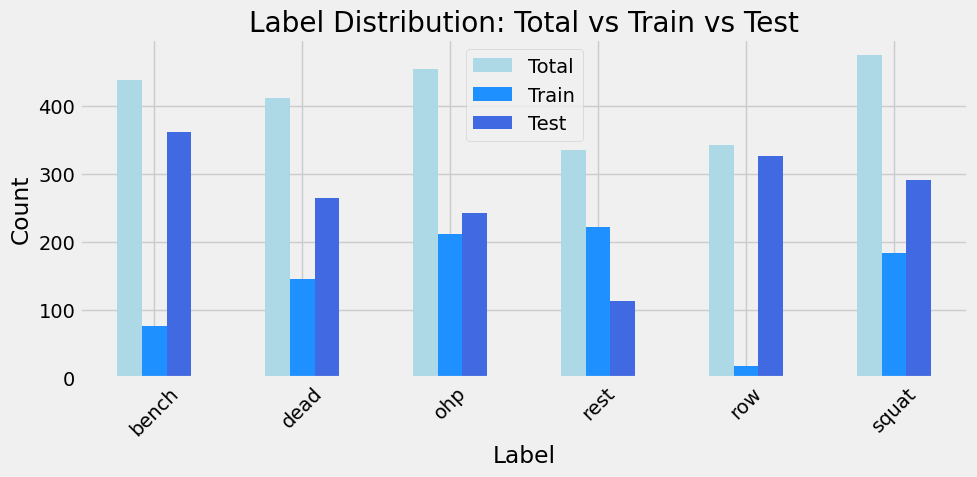

In [43]:
# Combine all counts into one DataFrame
combined_counts = pd.DataFrame({
    'Total': df_train["label"].value_counts(),
    'Train': y_train.value_counts(),
    'Test': y_test.value_counts()
}).fillna(0).astype(int)

# Plot side-by-side bars
combined_counts.plot(kind='bar', figsize=(10, 5), color=['lightblue', 'dodgerblue', 'royalblue'])

plt.title("Label Distribution: Total vs Train vs Test")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
combined_counts

,Total,Train,Test
bench,438,76,362
dead,411,146,265
ohp,454,212,242
rest,335,222,113
row,343,17,326
squat,474,183,291


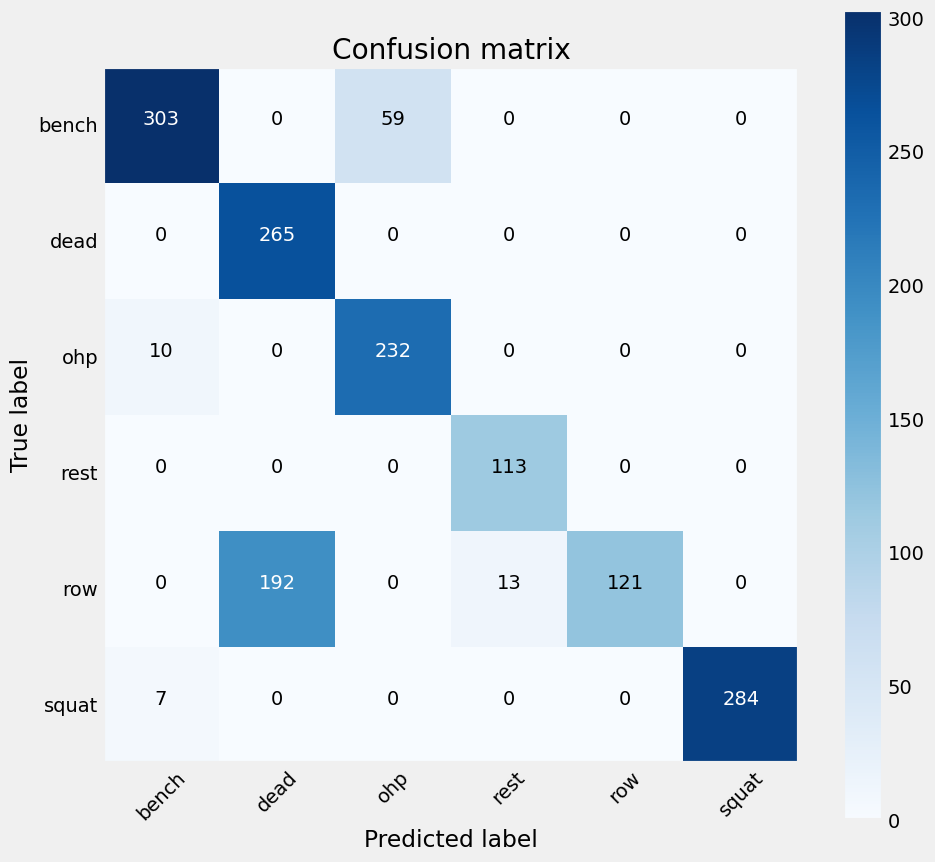

In [47]:
(
    class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(X_train[feature_set_4], 
                                  y_train, X_test[feature_set_4], gridsearch=True)




accuracy = accuracy_score(y_test, class_test_y)
classes = class_test_prob_y.columns 

cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [48]:
accuracy

0.8242651657285803

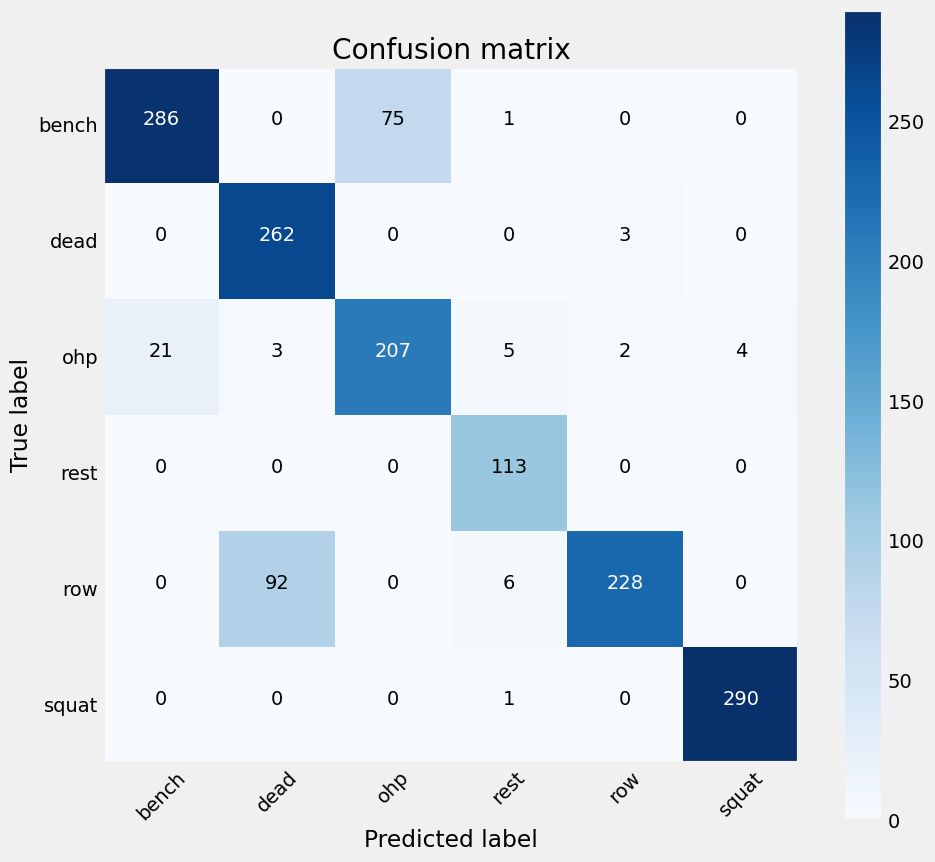

In [49]:
(
    class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(X_train[feature_set_3], 
                                  y_train, X_test[feature_set_3], gridsearch=False)




accuracy = accuracy_score(y_test, class_test_y)
classes = class_test_prob_y.columns 

cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [50]:
accuracy

0.8667917448405253

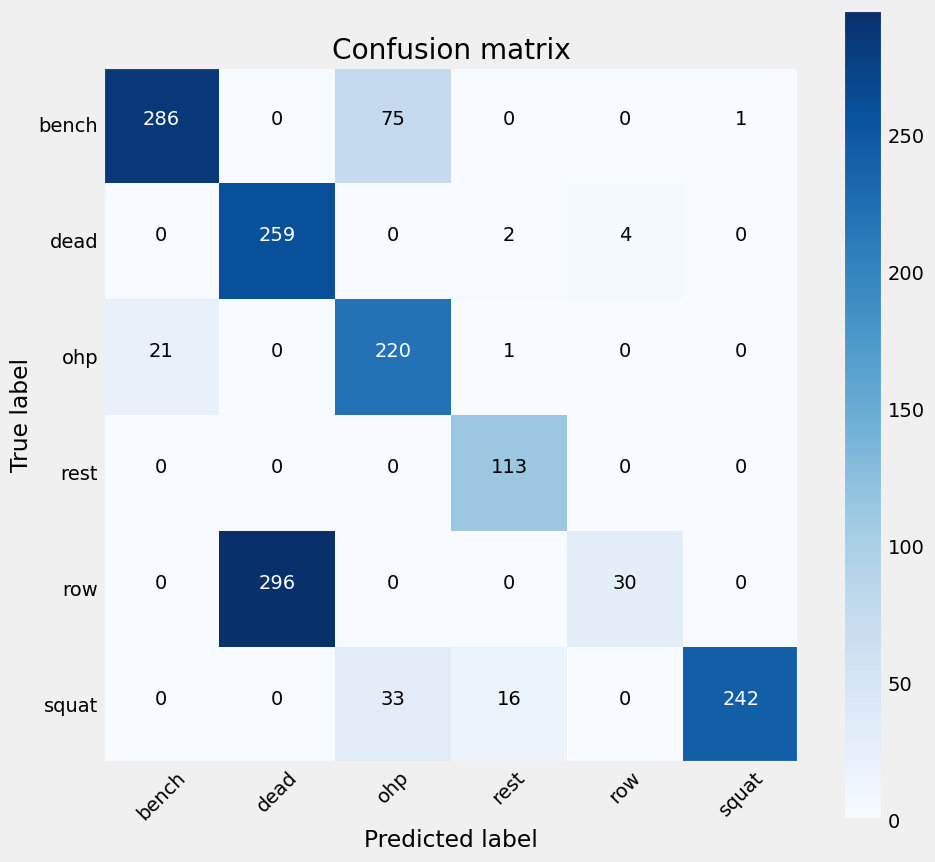

In [51]:
(
    class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(X_train[selected_features], 
                                  y_train, X_test[selected_features], gridsearch=False)




accuracy = accuracy_score(y_test, class_test_y)
classes = class_test_prob_y.columns 

cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [52]:
accuracy

0.7191994996873046

In [53]:
selected_features

['pca_1',
 'acc_x_temp_mean_ws_5',
 'acc_z_temp_mean_ws_5',
 'acc_z_freq_0.357_Hz_ws_14',
 'gyr_r_freq_weighted',
 'gyr_r_freq_0.714_Hz_ws_14',
 'acc_x_freq_0.357_Hz_ws_14',
 'gyr_x_freq_1.071_Hz_ws_14',
 'acc_r_freq_2.143_Hz_ws_14',
 'acc_y_freq_0.0_Hz_ws_14']

In [54]:
X_train[feature_set_4]

,acc_y_freq_1.786_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,gyr_y_temp_mean_ws_5,acc_r_freq_0.0_Hz_ws_14,gyr_x_temp_std_ws_5,gyr_y,gyr_r_max_freq,acc_r_pse,acc_r_freq_1.429_Hz_ws_14,acc_r_freq_weighted,...,gyr_z_freq_1.786_Hz_ws_14,acc_x_freq_1.071_Hz_ws_14,gyr_z_freq_0.0_Hz_ws_14,acc_r_freq_0.714_Hz_ws_14,acc_y_freq_2.143_Hz_ws_14,gyr_x,gyr_z_freq_0.357_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,acc_x_freq_2.143_Hz_ws_14,acc_x_max_freq
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:10:11.600,0.020619,-15.043378,-2.583473,4.440892e-16,7.044589,-2.222753,1.786,1.035133,0.022122,-0.046338,...,11.707727,0.044242,1.776357e-15,-0.447695,0.055327,16.193012,-72.126795,-12.203782,0.044133,0.357
2019-01-11 15:10:12.000,-0.050293,-11.410555,-8.364767,-1.887379e-15,7.523164,-17.284130,1.429,1.583267,-0.088519,2.008321,...,-26.845420,0.057239,1.421085e-14,-0.247873,-0.140491,-6.237237,-34.386700,-13.270864,0.007777,1.071
2019-01-11 15:10:12.600,0.339877,5.289367,-2.930626,-3.996803e-15,7.080235,7.257157,1.429,1.282669,0.446849,1.278768,...,-3.413880,-0.029441,7.105427e-15,-0.019254,0.243713,9.501332,-22.740926,-16.378386,0.033497,0.714
2019-01-11 15:10:13.000,-0.169667,-16.743843,2.359270,-3.108624e-15,8.916971,0.708400,0.714,1.097875,-0.219212,1.609950,...,-7.068371,0.118300,-1.332268e-14,-0.403104,-0.068695,-16.044521,72.653116,-27.050386,-0.001534,1.071
2019-01-11 15:10:13.600,-0.068697,16.807906,0.201627,-2.331468e-15,10.618857,-6.526575,1.786,1.236680,0.318781,0.425697,...,27.332086,-0.188809,-3.552714e-15,0.505762,-0.029538,7.740654,45.119502,-8.605694,-0.034371,0.357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-19 17:26:17.200,0.021116,-18.012252,-29.823640,-1.665335e-15,14.472891,-23.408712,0.357,1.296487,-0.235449,1.665262,...,-26.530132,-0.110861,-1.421085e-14,-0.083764,0.015582,2.525803,30.553777,41.955756,-0.047325,0.357
2019-01-19 17:26:17.800,-0.064380,-8.539227,-9.348863,2.109424e-15,12.554221,0.745791,0.714,1.294770,-0.059358,1.563396,...,18.748792,0.162629,-1.421085e-14,0.042021,-0.062273,23.097679,-40.814709,21.023595,0.073293,1.071
2019-01-19 17:26:18.200,-0.038613,-40.805614,9.034227,2.553513e-15,15.676548,27.067074,0.714,1.282226,0.171705,-5.103316,...,-1.198568,0.087389,-9.769963e-15,-0.150580,-0.043311,-19.779126,-67.906091,24.782650,0.057868,0.714


In [55]:
X_test[feature_set_4]

,acc_y_freq_1.786_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,gyr_y_temp_mean_ws_5,acc_r_freq_0.0_Hz_ws_14,gyr_x_temp_std_ws_5,gyr_y,gyr_r_max_freq,acc_r_pse,acc_r_freq_1.429_Hz_ws_14,acc_r_freq_weighted,...,gyr_z_freq_1.786_Hz_ws_14,acc_x_freq_1.071_Hz_ws_14,gyr_z_freq_0.0_Hz_ws_14,acc_r_freq_0.714_Hz_ws_14,acc_y_freq_2.143_Hz_ws_14,gyr_x,gyr_z_freq_0.357_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,acc_x_freq_2.143_Hz_ws_14,acc_x_max_freq
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.052098,-12.379067,-2.384442,-2.220446e-16,19.677257,-11.656954,0.714,1.031464,-0.168449,-0.146153,...,-16.908851,0.290557,1.065814e-14,-0.322799,0.034270,-28.374126,64.747522,-64.519718,0.077648,0.357
2019-01-11 15:08:09.000,0.064203,14.073251,-2.542502,-7.771561e-16,7.947655,-2.301694,0.714,1.115163,-0.179693,0.230011,...,1.752794,0.256784,3.552714e-15,-0.112347,0.013699,3.669106,-73.270750,-43.942175,0.006808,0.357
2019-01-11 15:08:09.600,0.030392,-33.185891,-1.088607,1.110223e-15,3.347321,4.434881,1.786,1.130408,-0.608718,1.733337,...,-8.329022,-0.311420,1.776357e-15,-0.373965,-0.007451,4.288229,-34.105958,-31.824063,-0.084516,0.714
2019-01-11 15:08:10.600,-0.116202,19.301024,0.781375,1.110223e-15,18.987636,-2.870890,0.357,0.842411,0.150859,0.482394,...,12.403580,-0.107533,-5.329071e-15,0.336079,-0.055870,1.551629,67.048818,2.256963,-0.016890,0.000
2019-01-11 15:08:11.400,-0.081055,-6.283743,-4.061379,4.662937e-15,19.112562,-8.347085,0.714,0.479708,0.004439,-0.546661,...,-17.081377,0.152146,1.243450e-14,-0.058777,-0.017276,-32.380685,51.362448,-61.187904,0.074481,1.071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:24.600,0.298845,7.435229,2.420290,4.440892e-15,31.019863,9.343802,0.357,0.833716,-0.446012,0.694957,...,-10.733410,-0.025392,1.776357e-15,1.362345,0.133749,-27.640236,4.704061,-15.544840,-0.024810,0.357
2019-01-20 17:33:25.000,-0.280446,19.392987,1.394130,5.551115e-16,16.021442,-12.198244,1.429,0.578900,0.517268,0.544186,...,0.742111,-0.003414,-2.664535e-15,-0.341267,-0.121598,4.043945,38.532505,-1.082287,0.034185,0.357
2019-01-20 17:33:26.000,-0.248442,-0.304794,-4.337438,-1.443290e-15,17.520632,3.249552,1.786,0.936968,0.879536,-0.344091,...,-6.632700,-0.082897,7.105427e-15,-0.235574,-0.144811,-14.471540,-33.615052,-25.491632,-0.048226,1.429


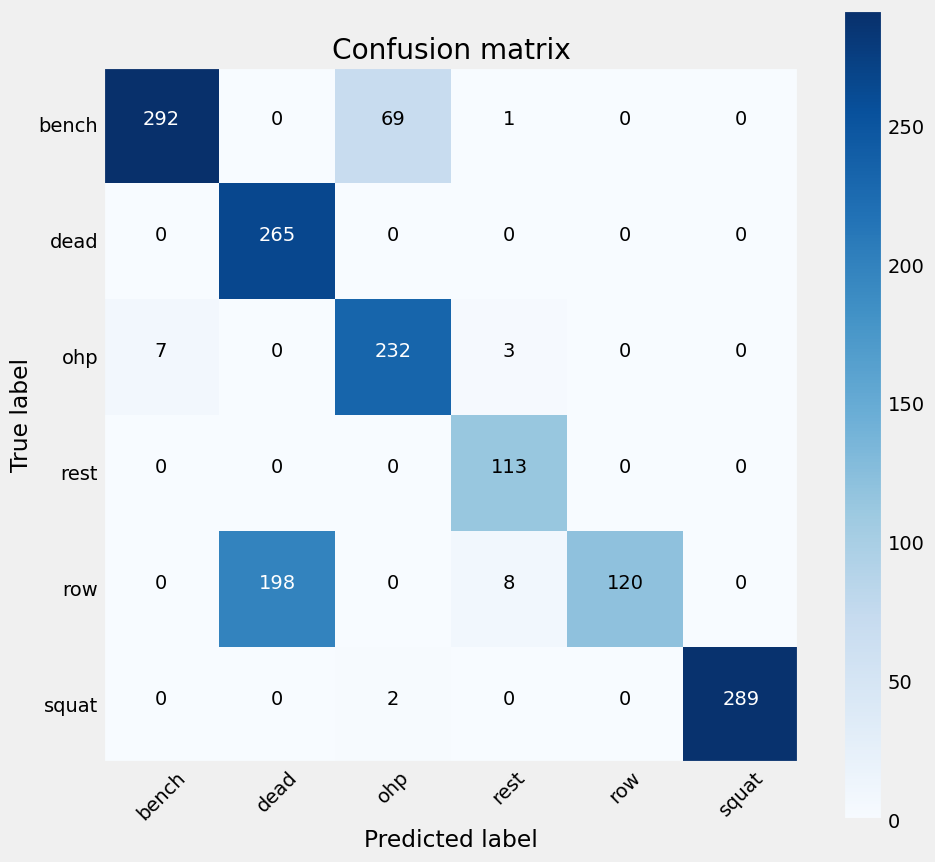

In [56]:
(
    class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(X_train[feature_set_4], 
                                  y_train, X_test[feature_set_4], gridsearch=True)




accuracy = accuracy_score(y_test, class_test_y)
classes = class_test_prob_y.columns 

cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [57]:
accuracy

0.8198874296435272